In [16]:
import glob
import json
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [12]:
experiments = []
for fname in glob.glob('results/*.details'):
    with open(fname) as f:
        experiment = json.loads(f.read())
        experiment['id'] = fname.split('/')[-1].split('.')[0]
        experiments.append(experiment)
df = pd.DataFrame(experiments)
df.head()

,Embedding Size,Beta,Margin,Batch Size,Max Step,Epochs,Use VINS,id
0,128,0.9,1,256,64,150,0,c1a44b89-ada4-4243-979f-341e3346cfea
1,16,0.9,1,256,64,150,1,0a922553-31a4-4b59-aa6c-124fd8a1314d
2,128,0.7,1,256,64,150,1,7301a07b-5cbe-45a3-84f6-9a64ada92212
3,128,0.1,1,256,64,150,1,d2074a52-c51e-44bb-ad28-dd25076515f6
4,128,0.5,1,256,64,150,1,912ca69d-b4ed-4763-b747-14bffcdcd8c8


In [47]:
trajectories = defaultdict(dict)
min_iter = np.inf
min_epoch = np.inf
for exp in df['id'].values:
    f1 = list(torch.load(f'results/{exp}.f1'))
    loss = list(torch.load(f'results/{exp}.loss'))
    ndcg = list(torch.load(f'results/{exp}.ndcg'))

    if len(f1) < min_epoch:
        min_epoch = len(f1)
    
    if len(loss) < min_iter:
        min_iter = len(loss)
    
    trajectories[exp]['f1'] = f1
    trajectories[exp]['ndcg'] = ndcg
    trajectories[exp]['loss'] = [l if type(l) == float else l.item() for l in loss]

In [48]:
for k, d in trajectories.items():
    trajectories[k]['f1'] = trajectories[k]['f1'][:min_epoch]
    trajectories[k]['ndcg'] = trajectories[k]['ndcg'][:min_epoch]
    trajectories[k]['loss'] = trajectories[k]['loss'][:min_iter]

In [49]:
df.sort_values('Embedding Size')

,Embedding Size,Beta,Margin,Batch Size,Max Step,Epochs,Use VINS,id
1,16,0.9,1,256,64,150,1,0a922553-31a4-4b59-aa6c-124fd8a1314d
7,64,0.9,1,256,64,150,1,fed3e15f-213f-473d-8ee7-90b9e45e04bf
0,128,0.9,1,256,64,150,0,c1a44b89-ada4-4243-979f-341e3346cfea
2,128,0.7,1,256,64,150,1,7301a07b-5cbe-45a3-84f6-9a64ada92212
3,128,0.1,1,256,64,150,1,d2074a52-c51e-44bb-ad28-dd25076515f6
4,128,0.5,1,256,64,150,1,912ca69d-b4ed-4763-b747-14bffcdcd8c8
5,128,0.3,1,256,64,150,1,497d4475-ccb1-4c9c-92b6-e520485696d4
6,128,0.9,1,256,64,150,1,85227c4b-e76d-4e7b-83ff-2f47cf8b37a8


# Effect of Embedding Size

In [50]:
min_iter, min_epoch

(792, 7)

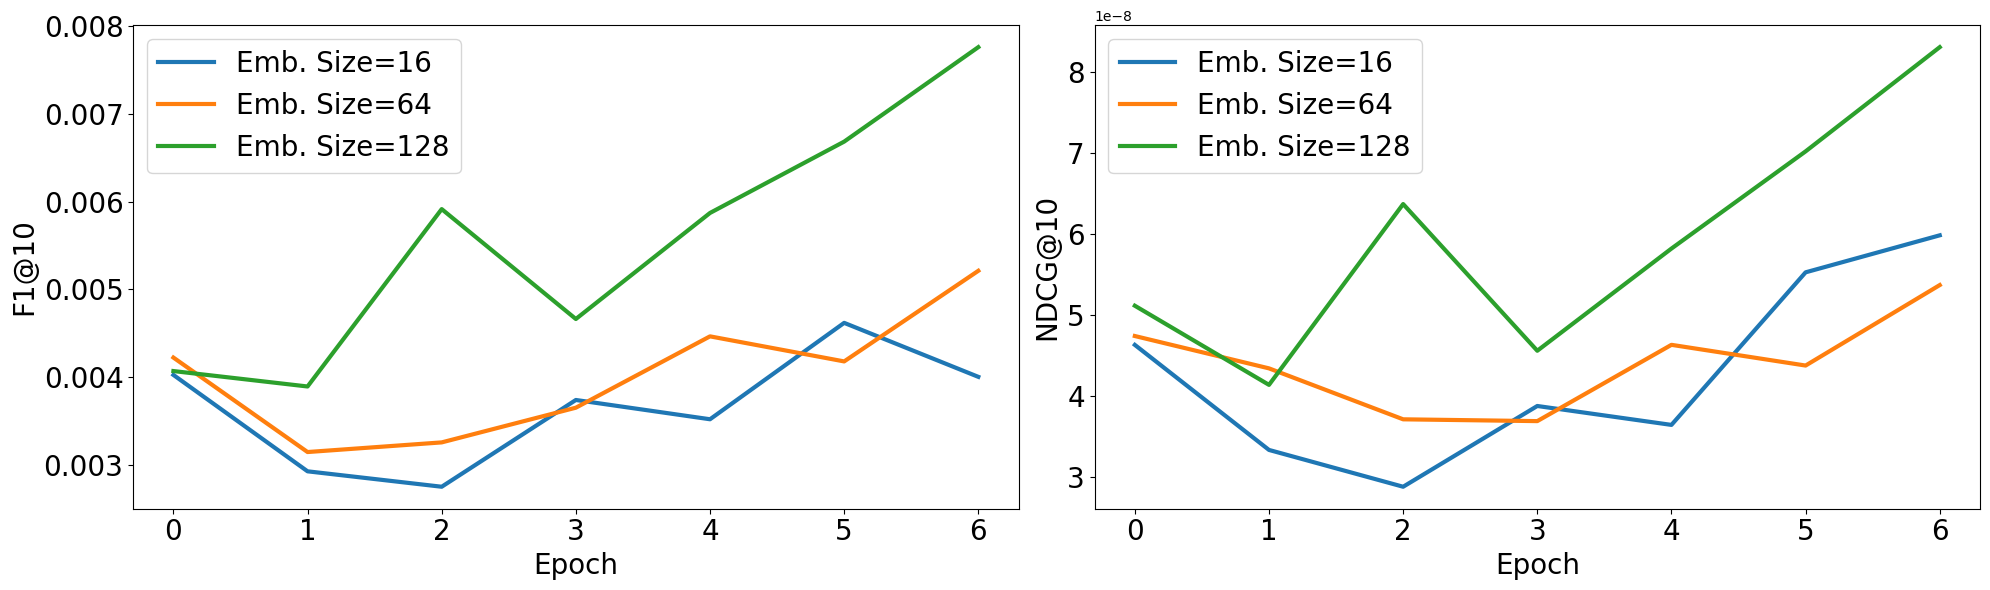

In [59]:
embed_size = ['0a922553-31a4-4b59-aa6c-124fd8a1314d', 'fed3e15f-213f-473d-8ee7-90b9e45e04bf', '85227c4b-e76d-4e7b-83ff-2f47cf8b37a8']
embed_exp = df[df['id'].isin(embed_size)].sort_values('Embedding Size')

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

cm = plt.get_cmap('tab10')
for i, (id_, embedding_size) in enumerate(zip(embed_exp['id'], embed_exp['Embedding Size'])):
    F = trajectories[id_]['f1']
    N = trajectories[id_]['ndcg']
    
    axes[0].plot(F, color=cm(i), label=f'Emb. Size={embedding_size}', linewidth=3)
    axes[1].plot(N, color=cm(i), label=f'Emb. Size={embedding_size}', linewidth=3)
    
for ax in axes:
    ax.legend(fontsize=20)
    ax.tick_params(labelsize=20)

axes[0].set_xlabel('Epoch', fontsize=20)
axes[1].set_xlabel('Epoch', fontsize=20)

axes[0].set_ylabel('F1@10', fontsize=20)
axes[1].set_ylabel('NDCG@10', fontsize=20)
fig.tight_layout()

In [60]:
df.sort_values('Beta')

,Embedding Size,Beta,Margin,Batch Size,Max Step,Epochs,Use VINS,id
3,128,0.1,1,256,64,150,1,d2074a52-c51e-44bb-ad28-dd25076515f6
5,128,0.3,1,256,64,150,1,497d4475-ccb1-4c9c-92b6-e520485696d4
4,128,0.5,1,256,64,150,1,912ca69d-b4ed-4763-b747-14bffcdcd8c8
2,128,0.7,1,256,64,150,1,7301a07b-5cbe-45a3-84f6-9a64ada92212
0,128,0.9,1,256,64,150,0,c1a44b89-ada4-4243-979f-341e3346cfea
1,16,0.9,1,256,64,150,1,0a922553-31a4-4b59-aa6c-124fd8a1314d
6,128,0.9,1,256,64,150,1,85227c4b-e76d-4e7b-83ff-2f47cf8b37a8
7,64,0.9,1,256,64,150,1,fed3e15f-213f-473d-8ee7-90b9e45e04bf


# Effect of Beta

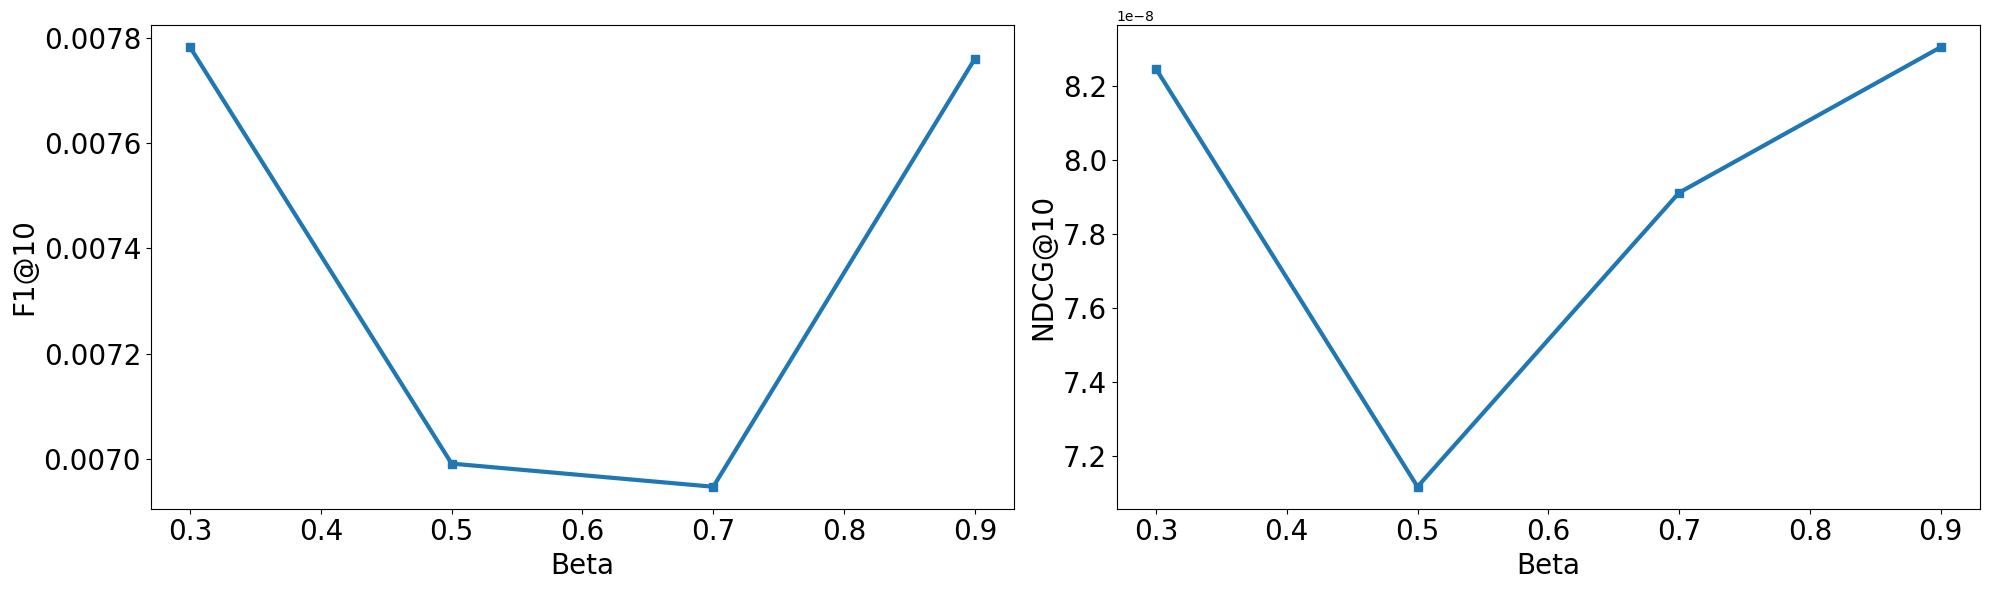

In [64]:
betas = ['d2074a52-c51e-44bb-ad28-dd25076515f', '497d4475-ccb1-4c9c-92b6-e520485696d4', '912ca69d-b4ed-4763-b747-14bffcdcd8c8', 
              '7301a07b-5cbe-45a3-84f6-9a64ada92212', '85227c4b-e76d-4e7b-83ff-2f47cf8b37a8']
beta_exp = df[df['id'].isin(betas)].sort_values('Beta')

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

cm = plt.get_cmap('tab10')

betas = []
f1s = []
ndcgs = []

for i, (id_, beta) in enumerate(zip(beta_exp['id'], beta_exp['Beta'])):
    F = trajectories[id_]['f1']
    N = trajectories[id_]['ndcg']
    betas.append(beta)
    f1s.append(max(F))
    ndcgs.append(max(N))
axes[0].plot(betas, f1s, marker='s', linewidth=3)
axes[1].plot(betas, ndcgs, marker='s', linewidth=3)
    
for ax in axes:
    ax.tick_params(labelsize=20)

    ax.set_xlabel('Beta', fontsize=20)

axes[0].set_ylabel('F1@10', fontsize=20)
axes[1].set_ylabel('NDCG@10', fontsize=20)
fig.tight_layout()

# VINS Gain

In [65]:
df.head(10)

,Embedding Size,Beta,Margin,Batch Size,Max Step,Epochs,Use VINS,id
0,128,0.9,1,256,64,150,0,c1a44b89-ada4-4243-979f-341e3346cfea
1,16,0.9,1,256,64,150,1,0a922553-31a4-4b59-aa6c-124fd8a1314d
2,128,0.7,1,256,64,150,1,7301a07b-5cbe-45a3-84f6-9a64ada92212
3,128,0.1,1,256,64,150,1,d2074a52-c51e-44bb-ad28-dd25076515f6
4,128,0.5,1,256,64,150,1,912ca69d-b4ed-4763-b747-14bffcdcd8c8
5,128,0.3,1,256,64,150,1,497d4475-ccb1-4c9c-92b6-e520485696d4
6,128,0.9,1,256,64,150,1,85227c4b-e76d-4e7b-83ff-2f47cf8b37a8
7,64,0.9,1,256,64,150,1,fed3e15f-213f-473d-8ee7-90b9e45e04bf


In [69]:
beta_exp

,Embedding Size,Beta,Margin,Batch Size,Max Step,Epochs,Use VINS,id


to
to
to
to


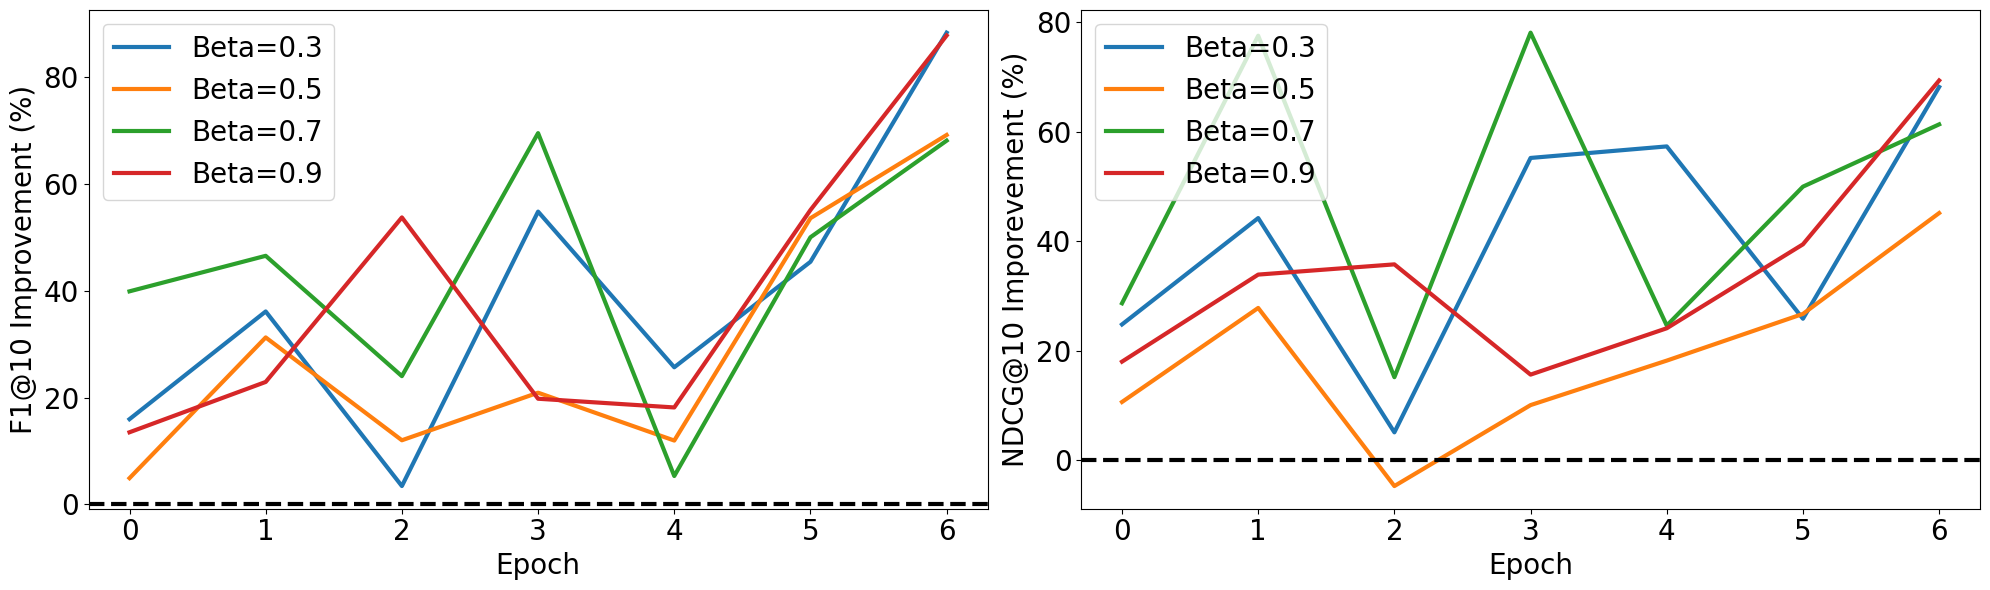

In [71]:
no_vins_id = 'c1a44b89-ada4-4243-979f-341e3346cfea'
betas = ['d2074a52-c51e-44bb-ad28-dd25076515f', '497d4475-ccb1-4c9c-92b6-e520485696d4', '912ca69d-b4ed-4763-b747-14bffcdcd8c8', 
              '7301a07b-5cbe-45a3-84f6-9a64ada92212', '85227c4b-e76d-4e7b-83ff-2f47cf8b37a8']
beta_exp = df[df['id'].isin(betas)].sort_values('Beta')

control_f1 = np.array(trajectories[no_vins_id]['f1'])
control_ndcg = np.array(trajectories[no_vins_id]['ndcg'])

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

cm = plt.get_cmap('tab10')

for i, (id_, beta) in enumerate(zip(beta_exp['id'], beta_exp['Beta'])):
    print('to')
    f1 = np.array(trajectories[id_]['f1'])
    ndcg = np.array(trajectories[id_]['ndcg'])

    f1_pg = 100 * (f1 - control_f1) / (control_f1)
    ndcg_pg = 100 * (ndcg - control_ndcg) / (control_ndcg)

    axes[0].plot(f1_pg, color=cm(i), label=f'Beta={beta}', linewidth=3)
    axes[1].plot(ndcg_pg, color=cm(i), label=f'Beta={beta}', linewidth=3)
    
for ax in axes:
    ax.legend(fontsize=20)
    ax.tick_params(labelsize=20)
    ax.axhline(y=0, linewidth=3, linestyle='--', color='black', label='Baseline (No VINS)')

axes[0].set_xlabel('Epoch', fontsize=20)
axes[1].set_xlabel('Epoch', fontsize=20)

axes[0].set_ylabel('F1@10 Improvement (%)', fontsize=20)
axes[1].set_ylabel('NDCG@10 Imporevement (%)', fontsize=20)
fig.tight_layout()
    